
# **Spotify Hits Predictor**

## Author: Aayush Chauhan  
## GitHub: [github.com/aayush010904](https://github.com/aayush010904)

## Introduction
Music streaming platforms like Spotify have revolutionized the way people discover and listen to music. With an immense amount of data available, analyzing the attributes of hit songs can provide valuable insights into what makes a song successful. This project focuses on predicting a song’s likelihood of becoming a hit based on key audio features extracted from Spotify’s dataset, covering songs from the 1960s to the 2010s.

## Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Loading the datasets

In [65]:
dfs = [pd.read_csv(f'datasets/dataset-of-{decade}0s.csv') for decade in ['0', '1','6','7','8','9']]


In [66]:
for i, decade in enumerate([1960,1970,1980,1990,2000, 2010]):
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

df = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [68]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,For Stormboy,Rhiannon Bannenberg,spotify:track:1gLbbnyTOnx6LrCQ87c0gp,0.197,0.0473,8,-29.125,0,0.0441,0.992000,0.861000,0.0878,0.127,123.367,96500,3,42.60198,6,0,1970
1,The World Wasn't Made in One Day,Boytronic,spotify:track:6fzbrF0HJl72bDPBB232Wp,0.677,0.3660,5,-15.258,1,0.0288,0.120000,0.000000,0.0796,0.598,100.566,234000,4,41.36228,12,0,2000
2,Questions and Conclusions,Black Heat,spotify:track:3keqvEnmiZfDZoeTa6EWAd,0.623,0.7290,7,-9.870,1,0.0553,0.061300,0.034700,0.0392,0.841,127.640,256747,4,24.47229,13,0,1990
3,Bottom Feeder,Project 86,spotify:track:5j58ixcXqWIMZlnzhr5wPx,0.481,0.6090,9,-7.570,0,0.0317,0.000701,0.004350,0.0967,0.198,119.758,311360,4,34.21364,14,0,1970
4,Little Girl,Syndicate Of Sound,spotify:track:3UxZw2CfZ3dmNIii4CxMtG,0.587,0.6080,2,-10.425,1,0.0291,0.049200,0.000338,0.2170,0.726,90.528,147827,4,25.31822,11,1,1980


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [72]:
# Checking null values
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

## Insights & Data Visualization
Data visualizations played a crucial role in understanding the impact of various features on a song’s success.


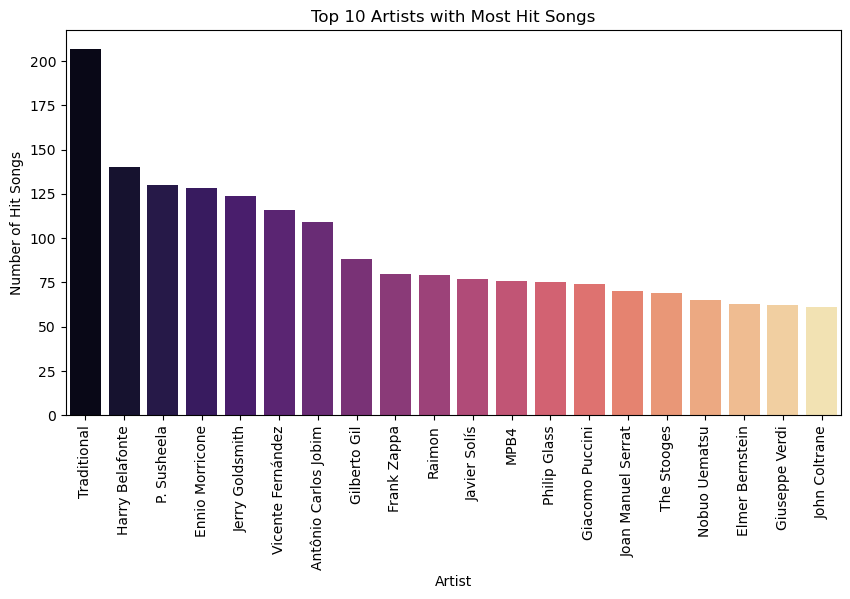

In [75]:
# Top 10 artists with most hit songs
top_artists = df['artist'].value_counts().head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.index, y=top_artists.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Top 10 Artists with Most Hit Songs")
plt.xlabel("Artist")
plt.ylabel("Number of Hit Songs")
plt.show()


The **influence of prominent artists** and how their musical features contributed to hit-making patterns.


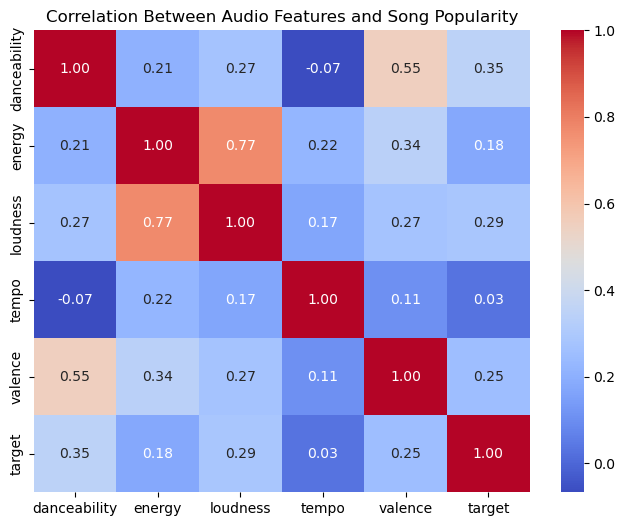

In [78]:
# Correlation between audio features and song popularity
audio_features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
correlation = df[audio_features + ['target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Audio Features and Song Popularity")
plt.show()


The correlation between **audio attributes and popularity**, highlighting which features were more likely to appear in successful tracks.

In [80]:
#getting number of hits vs non hits

y1 = df[df['target']==1]
y2 = df[df['target']==0]
print(f"The number of hits are: {y1.shape[0]}")
print(f"The number of non hits are: {y2.shape[0]}")


The number of hits are: 20553
The number of non hits are: 20553


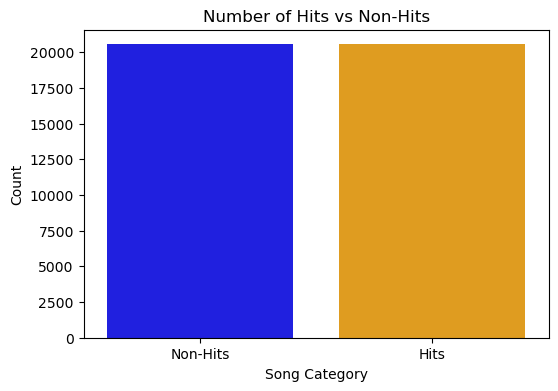

In [82]:
# Plot Grouped Bar Graph
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette=['blue', 'orange'])
plt.xticks([0, 1], ['Non-Hits', 'Hits'])
plt.xlabel("Song Category")
plt.ylabel("Count")
plt.title("Number of Hits vs Non-Hits")
plt.show()

## Data Analysis & Feature Selection
The dataset comprises a vast collection of songs from different decades, each characterized by multiple audio features such as:
- **Tempo**: The speed or pace of a song (measured in BPM).
- **Loudness**: Overall volume intensity of the track.
- **Danceability**: A measure of how suitable a song is for dancing.
- **Energy**: The intensity and activity level of a song.

To understand the evolution of hit songs, we analyzed trends across these features and examined how they contributed to a track’s popularity over time.



In [84]:
#selecting features

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature', 'chorus_hit', 'sections']
target = 'target'

In [86]:
#data preprocessing

X = df[features]
y = df[target]

In [88]:
#standardise numerical features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Principal Component Analysis (PCA)

To reduce the dimensionality of the dataset and retain the most important features, we applied **Principal Component Analysis (PCA)**. PCA helps in identifying the key components that contribute the most variance to the data, allowing us to visualize high-dimensional feature space in a lower-dimensional format. This step ensures that the models are trained on the most relevant information while reducing redundancy and improving computational efficiency.

In [91]:
# Apply PCA

pca = PCA(n_components=0.98)  # Use all 4 features first
X_pca = pca.fit_transform(X_scaled)

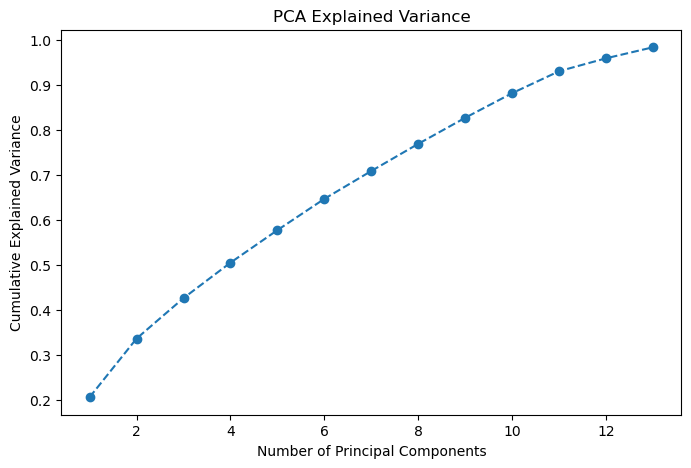

In [93]:
# Explained variance plot
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1,num_components+1 ), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [98]:
# Select optimal number of components

pca_optimal = PCA(n_components=7)
X_pca_opt = pca_optimal.fit_transform(X_scaled)

## Model Training & Evaluation

To predict whether a song would become a hit, we trained multiple machine learning models, including:

- **Support Vector Machine (SVM)**
- **Random Forest Classifier**
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**

Feature engineering was performed to refine the dataset, ensuring that relevant attributes were emphasized. Hyperparameter tuning was applied to optimize model performance. The models were evaluated using accuracy and F1-score to measure their effectiveness in distinguishing hit songs from non-hit songs.

In [100]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_opt, y, test_size=0.2, random_state=42)

In [102]:
# Model Training and Evaluation
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

SVM - Accuracy: 0.7372, F1-score: 0.7667
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      4102
           1       0.69      0.86      0.77      4120

    accuracy                           0.74      8222
   macro avg       0.75      0.74      0.73      8222
weighted avg       0.75      0.74      0.73      8222



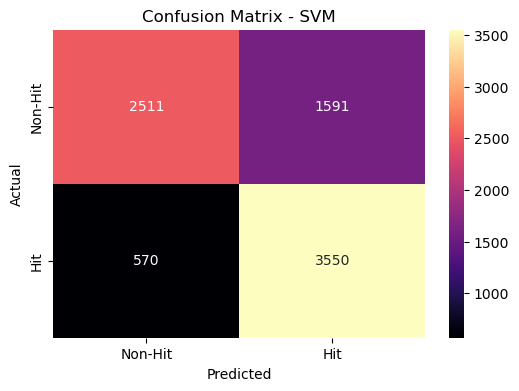

Random Forest - Accuracy: 0.7347, F1-score: 0.7502
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      4102
           1       0.71      0.79      0.75      4120

    accuracy                           0.73      8222
   macro avg       0.74      0.73      0.73      8222
weighted avg       0.74      0.73      0.73      8222



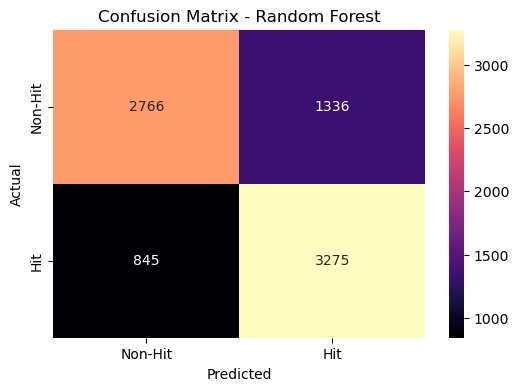

Logistic Regression - Accuracy: 0.6964, F1-score: 0.7125
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      4102
           1       0.68      0.75      0.71      4120

    accuracy                           0.70      8222
   macro avg       0.70      0.70      0.70      8222
weighted avg       0.70      0.70      0.70      8222



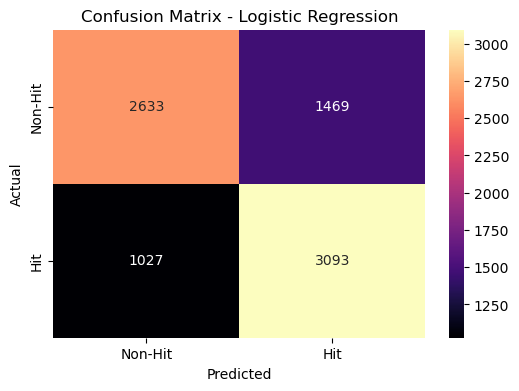

KNN - Accuracy: 0.7176, F1-score: 0.7372
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4102
           1       0.69      0.79      0.74      4120

    accuracy                           0.72      8222
   macro avg       0.72      0.72      0.72      8222
weighted avg       0.72      0.72      0.72      8222



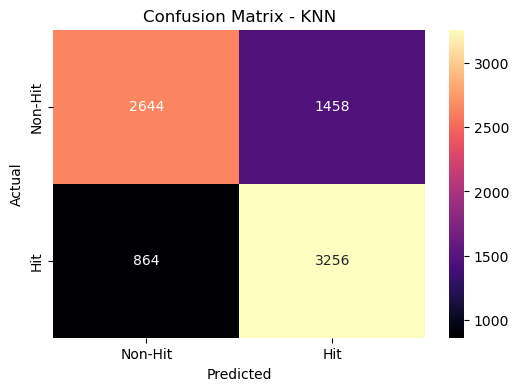

In [105]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Non-Hit', 'Hit'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


## Hyperparameter Tuning using RandomizedSearchCV

To improve model performance, we implemented hyperparameter tuning using **`RandomizedSearchCV`**. This method allows for efficient exploration of hyperparameter space by randomly selecting combinations rather than exhaustively searching all possibilities. The key advantages of `RandomizedSearchCV` include:

- Faster computation compared to GridSearchCV.
- A higher chance of finding optimal parameters with limited resources.
- The ability to define distributions for hyperparameters, improving search efficiency.

In [128]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss

Here, in case of Support Vector Machine (SVM) as it is showing the highest accuracy, we tuned parameters such as:

- **C** (Regularization parameter)
- **kernel** (Specifies the kernel type: 'linear', 'poly', 'rbf', or 'sigmoid')
- **gamma** (Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels)
- **degree** (Degree of the polynomial kernel function when 'poly' is chosen)

After tuning, we selected the best-performing hyperparameters based on cross-validation results and applied them to the final model.

In [131]:
svm_params = {
    "C": ss.uniform(0.01, 10),  # Continuous range for C
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

svm_random = RandomizedSearchCV(SVC(), svm_params, cv=5, scoring="accuracy", n_iter=10, random_state=42)
svm_random.fit(X_train, y_train)

best_svm = svm_random.best_estimator_
print(f"SVM Best Params: {svm_random.best_params_}")
print(f"SVM Best Accuracy: {svm_random.best_score_}")


SVM Best Params: {'C': 6.184815096277165, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Best Accuracy: 0.7408770730929543


_Uncomment for tuning other models_

In [121]:

# rf_params = {
#     "n_estimators": ss.randint(50, 300),
#     "max_depth": ss.randint(5, 30),
#     "min_samples_split": ss.randint(2, 10),
# }

# rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=5, n_iter=10, scoring="accuracy", random_state=42)
# rf_random.fit(X_train, y_train)

# best_rf = rf_random.best_estimator_
# print(f"Random Forest Best Params: {rf_random.best_params_}")
# print(f"Random Forest Best Accuracy: {rf_random.best_score_}")


In [123]:
# knn_params = {
#     "n_neighbors": ss.randint(3, 15),
#     "metric": ["euclidean", "manhattan", "minkowski"],
#     "weights": ["uniform", "distance"]
# }

# knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_iter=10, scoring="accuracy", random_state=42)
# knn_random.fit(X_train, y_train)

# best_knn = knn_random.best_estimator_
# print(f"KNN Best Params: {knn_random.best_params_}")
# print(f"KNN Best Accuracy: {knn_random.best_score_}")
# 

In [125]:
# lr_params = {
#     "C": ss.uniform(0.01, 10),  # Continuous range for C
#     "penalty": ["l1", "l2"],
#     "solver": ["liblinear", "saga"]
# }

# lr_random = RandomizedSearchCV(LogisticRegression(), lr_params, cv=5, n_iter=10, scoring="accuracy", random_state=42)
# lr_random.fit(X_train, y_train)

# best_lr = lr_random.best_estimator_
# print(f"Logistic Regression Best Params: {lr_random.best_params_}")
# print(f"Logistic Regression Best Accuracy: {lr_random.best_score_}")


In [133]:
# Retrain SVM with best params
best_svm = SVC(**svm_random.best_params_)
best_svm.fit(X_train, y_train)


SVC(C=6.184815096277165, gamma='auto')

In [115]:
# # Retrain Random Forest
# best_rf = RandomForestClassifier(**rf_random.best_params_)
# best_rf.fit(X_train, y_train)

# # Retrain Logistic Regression
# best_lr = LogisticRegression(**lr_random.best_params_)
# best_lr.fit(X_train, y_train)

# # Retrain KNN
# best_knn = KNeighborsClassifier(**knn_random.best_params_)
# best_knn.fit(X_train, y_train)

In [141]:
print(f"Final Accuracy After Retraining SVM: {best_svm.score(X_test, y_test):.4f}")



Final Accuracy After Retraining SVM: 0.7419


## Conclusion

This project demonstrates the power of machine learning in music analytics by providing predictive insights into what makes a song a hit. The findings could be useful for artists, producers, and music analysts in optimizing their compositions for greater commercial success. Further improvements could include incorporating lyrical sentiment analysis and social media engagement metrics to enhance prediction accuracy.

## References

[Ioannis Dimolitsas, Spyridon Kantarelisy and Afroditi Foukaz, "SpotHitPy: A Study For ML-Based Song Hit Prediction Using Spotify" in 19 Jan 2023, School of Electrical and Computer Engineering, National Technical University of Athens, Athens, Greece](https://www.researchgate.net/publication/367280936_SpotHitPy_A_Study_For_ML-Based_Song_Hit_Prediction_Using_Spotify)ey